In [1]:
import pandas as pd 
import seaborn as sns 
from data_loader import get_dataset

In [2]:
loans_income = get_dataset(url="https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/loans_income.csv" , 
                           file_name="loans_income")
loans_income.head()

File doesn't exists. Downloading ...............


,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [40]:
index = pd.Index(range(1000))
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000).squeeze().values , 
    'type' : ['Data'] * 1000
} , index = index)

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).squeeze().values.mean() for _ in range(1000)] , 
    'type' : 'Mean of 5' 
} , index   = index )

sample_mean_50 = pd.DataFrame({
    'income' : [loans_income.sample(50).squeeze().values.mean() for _ in range(1000)] , 
    'type': 'Mean of 50'
}, index=index)



In [41]:
results = pd.concat([sample_data , sample_mean_05 , sample_mean_50])
results.shape

(3000, 2)

In [37]:
import matplotlib.pyplot as plt

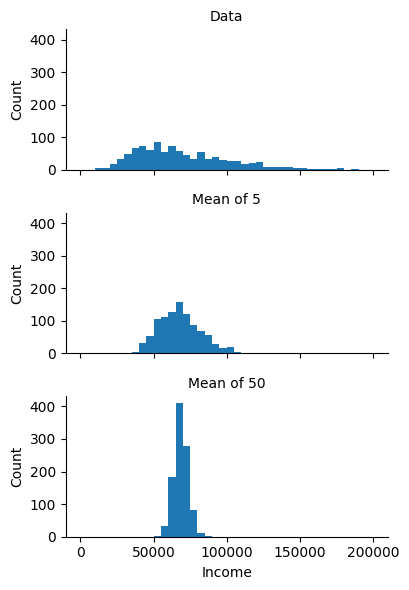

In [42]:
g = sns.FacetGrid(results , col = 'type' , col_wrap=1 , height=2 , aspect=2)
g.map(plt.hist , 'income' , range=[0 , 200000] , bins = 40)
g.set_axis_labels('Income' , 'Count')
g.set_titles('{col_name}')

In [44]:
#Bootstrap sample -> sample taken with replacement from an observed dataset 
#simply sample with replacement which creates an infinite population 
from sklearn.utils import resample

In [56]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.DataFrame(results)

print("Bootstrap Statistics:")
print(f"Original median: {loans_income['x'].median()}")
print(f"Bias : {results['x'].mean() - loans_income['x'].median()}")
print(f"Std error: {results['x'].std()}")

Bootstrap Statistics:
Original median: 62000.0
Bias : -69.47649999999703
Std error: 215.31386917709227
